<font size=7> Latency Pair Animations

In this notebook we create animations of when certain pairs neurons fire.

In [1]:
from matplotlib.animation import FuncAnimation

In [2]:
from matplotlib.patches import FancyArrow

In [3]:
from human_hip.spike_data import curate_latencies, latency_times
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np

<font color="orange">

Usefule Notebook: [Title](../../dev/other/ari/Directed_Latency_animation.ipynb)

# Get Pairs

In [2]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb') as handle:
    sd = pickle.load(handle)

In [24]:
good_pairs = curate_latencies(sd)

18496 Starting Pairs
567 pairs above sttc cutoff
360 pairs above latencency cutoff
Starting cross_sttc calculation... might take a minute
77 pairs between cross_sttc cutoffs


Get pairs as raster

<font color="orange"> 

Note: I want to replace this code with with something that shows the direciton of the arrows. This is easier to start with though.

In [50]:
latency_raster = {}
for pair in good_pairs:
    #latency_raster[ (pair[0],pair[1]) ] = latency_times( pair[0], pair[1], sd, ms_cutoff=15, positive_only=False)
    latency_raster[ (pair[0],pair[1]) ] =  latency_times( pair[0], pair[1], sd, ms_cutoff=15, positive_only=True )
    latency_raster[ (pair[1],pair[0]) ] =  latency_times( pair[1], pair[0], sd, ms_cutoff=15, positive_only=True )
latency_raster = {k:v for k,v in latency_raster.items() if len(v)>0 } # remove empty lists

In [84]:
print( sum( [ len(x) for x in latency_raster.values() ] ), " latencies recorded" )

4313  latencies recorded


# Create Animation

get which neurons fired every second

In [119]:
neurons_by_time = []
for i in range(0, int(sd.length), 1000 ):                                # loop over time, each second
    firing_neurons = []
    for pair,times in latency_raster.items() :                                   # loop over neurons
        if np.sum( np.abs( times - i ) < 500 ):             # if neuron pair fires least once within  1 second timepoint
            firing_neurons.append( pair )
    neurons_by_time.append( firing_neurons )

create plot

/tmp/ipykernel_25235/3715786536.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


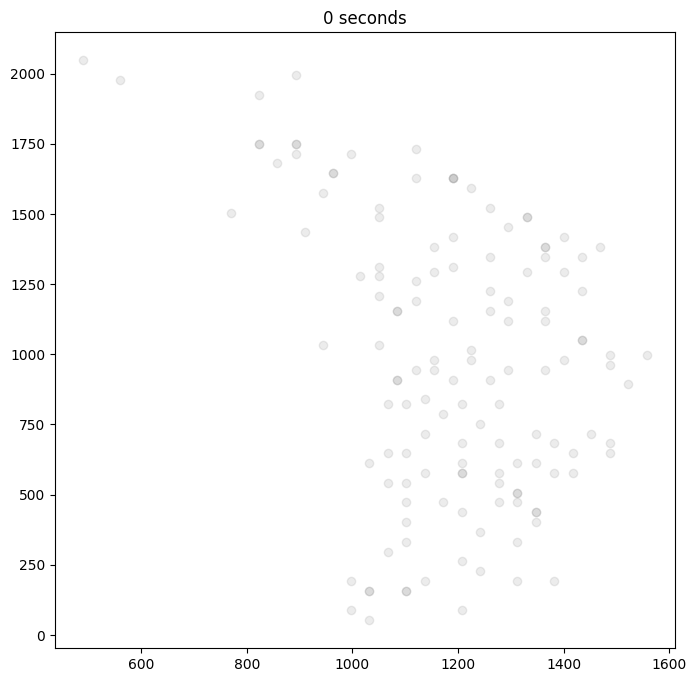

In [171]:
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

# Plot original scatter
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()                    # get axis element to later create plot
ax.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')

# animation function.  This is called sequentially
def animate(i):
    ax.set_title(f"{i} seconds")
    for patch in ax.patches:
        patch.remove()

    for pair in neurons_by_time[i]:
        start = neuron_xy[ pair[0] ]
        end = neuron_xy[ pair[1] ] - start
        arrow = FancyArrow(  start[0], start[1], end[0], end[1], length_includes_head=True, head_width=25,
                            linewidth=1, color="red", alpha=0.7, edgecolor="red", facecolor="red" )
        ax.add_patch(arrow)
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(120), interval=500, blit=False)  #5700


In [165]:
len(list(range(20))) * 100 / 1000

2.0

In [172]:
anim.save( "checkit.mp4" )

/tmp/ipykernel_25235/3715786536.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(  start[0], start[1], end[0], end[1], length_includes_head=True, head_width=25,


# <font color="brown"> Example Code

Useful: https://stackoverflow.com/questions/21687571/matplotlib-remove-patches-from-figure

## Example patches animation

https://stackoverflow.com/questions/19981054/animating-patch-objects-in-python-matplotlib

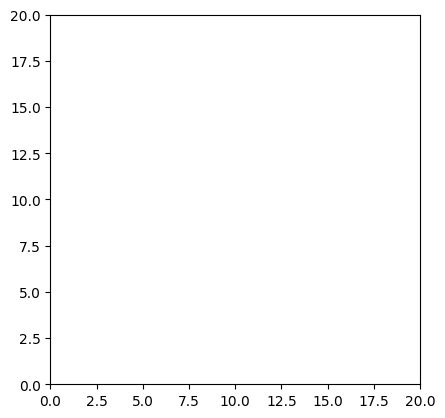

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

nx = 20
ny = 20

fig = plt.figure()
plt.axis([0,nx,0,ny])
ax = plt.gca()
ax.set_aspect(1)

def init():
    # initialize an empty list of cirlces
    return []

def animate(i):
    # draw circles, select to color for the circles based on the input argument i. 
    someColors = ['r', 'b', 'g', 'm', 'y']
    patches = []
    for x in range(0,nx):
        for y in range(0,ny):
            patches.append(ax.add_patch( plt.Circle((x+0.5,y+0.5),0.45,color=someColors[i % 5]) ))
    return patches

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)

In [65]:
anim.save("test.mp4")